In [1]:
%matplotlib Notebook

In [2]:
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

<IPython.core.display.Javascript object>


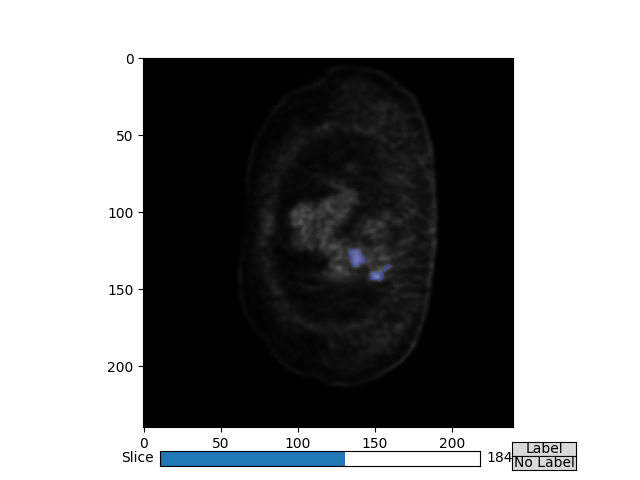

In [3]:
class MRIVisualizer:
    """
    Visualization of mri images in the nii format, including a Slider and a Label Toggle Button
    """
    def __init__(self, path_to_sequence, path_to_label):
        """
        Sets up the Figure
        Args:
            path_to_sequence (str): Path to the sequence nii file.
            path_to_label (str): Path to the label nii file.
        """
        
        sequence = nib.load(path_to_sequence)
        label = nib.load(path_to_label)

        self.data = sequence.get_fdata()
        self.label = label.get_fdata()
        self.masked_labels = np.ma.masked_where(self.label == 0, self.label)

        self.fig, axis = plt.subplots()

        self.slider, self.button_toggle, self.button_untoggle = self.create_widgets()
        
        self.slider.on_changed(self.update)
        self.button_toggle.on_clicked(self.toggle_label)
        self.button_untoggle.on_clicked(self.untoggle_label)
        
        self.mri_slice = axis.imshow(self.data[:,:,0], cmap="gray", vmin=0, vmax=10)
        self.label_slice = axis.imshow(self.masked_labels[:, :, 0], alpha=0, cmap="coolwarm")

        
    def create_widgets(self):
        """
        Creates the widgets: Slider and two Buttons for showing the Labels and removing them
        Args:
            None
        """
        
        ax_slider = plt.axes([0.25, 0.03, 0.5, 0.03])
        ax_label = plt.axes([0.8, 0.05, 0.1, 0.03])
        ax_no_label = plt.axes([0.8, 0.02, 0.1, 0.03])

        slider = Slider(ax_slider, 'Slice', 0, self.data.shape[-1], valinit=0, valfmt="%i")

        button_toggle = Button(ax_label, "Label")
        button_untoggle = Button(ax_no_label, "No Label")

        return slider, button_toggle, button_untoggle

    
    def update(self, val):
        """
        Updates the figure when moving the Slider. Connected in init
        Args:
            val (float): Value of the Slider
        """

        slice_index = int(self.slider.val)
        self.mri_slice.set_data(self.data[:,:,slice_index])
        self.label_slice.set_data(self.masked_labels[:,:,slice_index])

        self.fig.canvas.draw_idle()
    
    
    def toggle_label(self, event):
        """
        Shows the labels by setting the alpha value to 0.5
        Args:
            event (event): EventTrigger
        """

        self.label_slice.set_alpha(0.5)

    
    def untoggle_label(self, event):
        """
        Removes the labels by setting the alpha value to 0
        Args:
            event (event): EventTrigger
        """

        self.label_slice.set_alpha(0)
MRIVisualizer("../../../../petbc_lesions/0001/sequences/0001_petsuv.nii", "../../../../petbc_lesions/0001/labels/iso_0001_tumor.nii.gz")

<IPython.core.display.Javascript object>


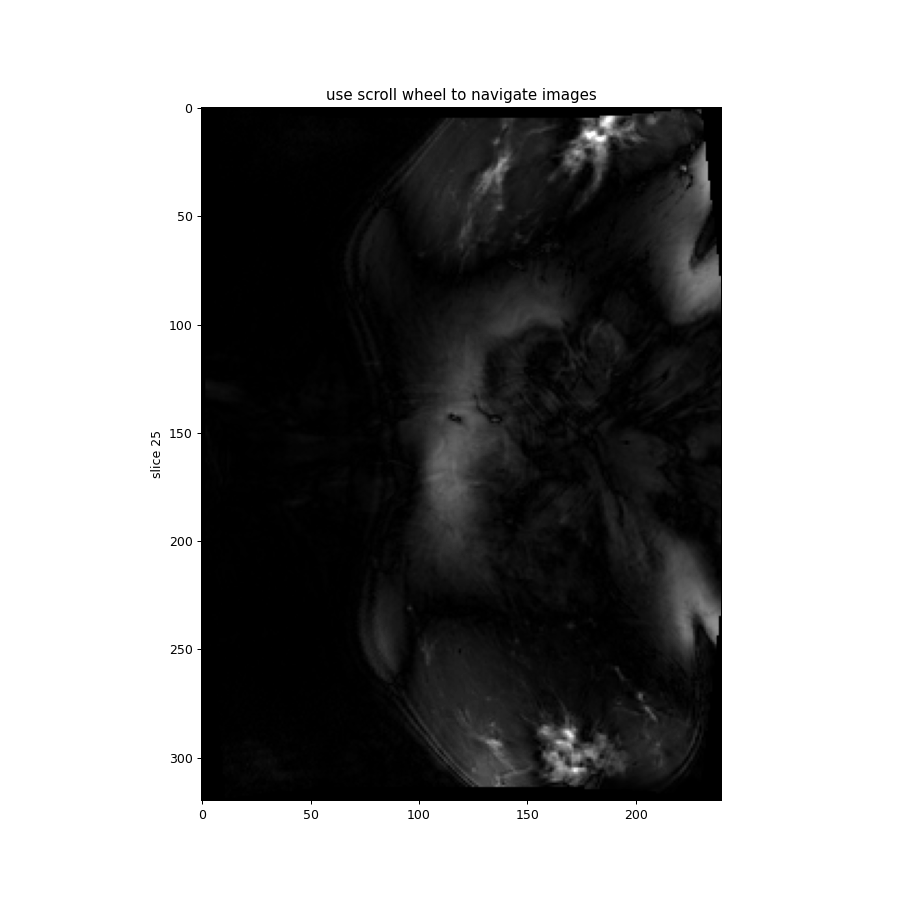

In [7]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind], cmap='gray')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(figsize=(10,10))

img = nib.load('/mnt/share/raheppt1/NAKO/Tho_COR/000/sequence/100000_MRA_Tho_COR.nii')
data = img.get_fdata()

tracker = IndexTracker(ax, data)


fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()